In [15]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
mrna_data = pd.read_csv("mRna_sorted_out.csv")

In [3]:
mrna_data

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-05-4384-01,0.320554,-0.355983,-0.529276,-0.124322,-0.764927,0.964868,-0.998800,0.143914,-0.457862,...,1.343409,1.155681,0.758608,-0.463072,-0.228734,-0.277139,1.132891,0.309396,1.477604,-0.33378
1,TCGA-05-4390-01,0.594685,-0.355983,3.025944,-0.767208,-0.435903,-0.420627,0.880830,-0.492057,3.433639,...,0.195067,1.746324,-0.923125,-0.481744,-1.017928,0.612052,-0.601423,-0.874406,-1.220134,1.55501
2,TCGA-05-4396-01,-1.762553,2.541312,-0.529276,0.787260,-0.389013,0.209189,-0.585046,-0.410264,0.692297,...,1.438582,1.429703,1.358220,0.334782,-0.916596,-1.628285,0.777455,0.923403,-0.635217,-0.33378
3,TCGA-05-4405-01,0.467002,-0.355983,-0.529276,0.546678,-0.202779,0.503953,0.114976,-0.085408,0.578343,...,-0.458229,-0.646143,-0.166644,0.819677,0.561142,-0.114283,0.758501,0.120023,-0.938454,-0.33378
4,TCGA-05-4415-01,-1.139537,-0.355983,-0.529276,0.122176,-0.200491,-1.891908,-0.244453,-0.081417,-0.457862,...,0.391513,-0.101447,-0.352774,1.453256,-0.726249,1.195260,-0.189220,0.480549,-0.804340,-0.33378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,TCGA-99-7458-01,0.095888,-0.355983,-0.307915,0.144508,-0.036112,0.783205,-0.678540,0.205316,1.772044,...,0.789165,0.252348,0.696818,-1.352699,1.809593,-0.360307,0.217319,1.140851,-0.304376,-0.33378
290,TCGA-99-8025-01,1.393299,-0.355983,0.126539,1.197795,-0.764927,-0.041418,0.800551,-0.472578,-0.457862,...,-1.165354,-0.346782,-0.223454,1.269340,-0.570358,0.367029,-0.691270,-0.818714,-0.171122,-0.33378
291,TCGA-99-8028-01,1.315296,-0.355983,-0.529276,1.112630,-0.526328,0.477632,1.314540,0.549165,-0.457862,...,-1.350587,-1.160407,-0.778568,0.874488,-0.630329,0.891170,-0.046689,-0.840887,-0.274452,-0.33378
292,TCGA-99-8032-01,0.046761,2.594220,2.421133,0.182626,-0.379981,0.898183,0.668004,0.466180,-0.457862,...,-0.186502,-0.125737,0.739671,0.352792,-0.904565,-0.018628,0.471576,-0.664392,-0.066914,-0.33378


In [61]:
patient = mrna_data.iloc[:].T
trans_pat =  patient.values.reshape(1,-1).T
#patient = patient.values.reshape(1,-1).T

In [13]:
#transposed = mrna_data.T

In [14]:
# transposed.to_csv("transposed_mrna.csv")

In [64]:
true_data = patient[1:]

In [98]:
def f_tsne(perplex,dist):
    tsne = TSNE(n_components=2,verbose=0,perplexity=perplex,n_iter=1000, metric=dist)
    tsne_results = tsne.fit_transform(true_data)
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    #df_subset['genes'] = list(data.columns)[1:]
    #plt.figure(figsize=(16,10))
    #sns.set_context("notebook", font_scale=1.1)
    #sns.set_style("ticks")
    plt.clf()
    plot = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",data=df_subset,legend="full",alpha=0.1).set_title('tsne-plot-perplexity_' + dist + '___' +str       (perplex)+ '_')
    plot.figure.savefig('plots/tsne-plot-perplexity_'+ dist + '___'+ str(perplex)+ '.svg', format = 'svg', dpi = 1200)

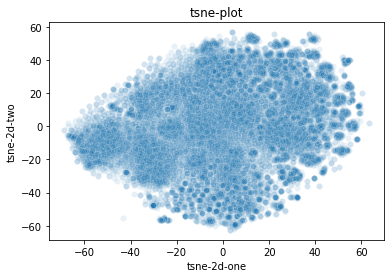

In [79]:


# df_subset = pd.DataFrame()
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
# #df_subset['genes'] = list(data.columns)[1:]
# #plt.figure(figsize=(16,10))
# #sns.set_context("notebook", font_scale=1.1)
# #sns.set_style("ticks")
# plot = sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     #hue="y",
#     #palette=sns.color_palette("hls", 5),
#     data=df_subset,
#     legend="full",
#     alpha=0.1
# ).set_title('tsne-plot')


In [82]:
#plot.figure.savefig('plots/tsne-plot.svg', format = 'svg', dpi = 1200)

In [102]:
f_tsne(7,'haversine')

ValueError: Haversine distance only valid in 2 dimensions